# Olympic Gold Medal Analysis 
![Image of olympic athlete with microphone and signs around](logo.png)

### Data Sources
* [Olympic Host Data](https://www.kaggle.com/datasets/piterfm/olympic-games-medals-19862018?select=olympic_hosts.csv)
* [Olympic Medal Data](https://www.kaggle.com/datasets/piterfm/olympic-games-medals-19862018?select=olympic_medals.csv)

In [1]:
!pip install prophet
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
# Read in CSV files for retail, olympic host, and olympic medals data
olympic_host_data = pd.read_csv('olympic_hosts.csv')
olympic_medals_data = pd.read_csv('olympic_analysis.csv')

display(olympic_host_data.head())
display(olympic_medals_data.head())

,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year
0,beijing-2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022
1,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020
2,pyeongchang-2018,2018-02-25T08:00:00Z,2018-02-08T23:00:00Z,Republic of Korea,PyeongChang 2018,Winter,2018
3,rio-2016,2016-08-21T21:00:00Z,2016-08-05T12:00:00Z,Brazil,Rio 2016,Summer,2016
4,sochi-2014,2014-02-23T16:00:00Z,2014-02-07T04:00:00Z,Russian Federation,Sochi 2014,Winter,2014


,edition,edition_id,year,country,country_noc,gold,silver,bronze,total
0,1896 Summer Olympics,1,1896,United States,USA,11,7,2,20
1,1896 Summer Olympics,1,1896,Greece,GRE,10,18,19,47
2,1896 Summer Olympics,1,1896,Germany,GER,6,5,2,13
3,1896 Summer Olympics,1,1896,France,FRA,5,4,2,11
4,1896 Summer Olympics,1,1896,Great Britain,GBR,2,3,2,7


In [3]:
# Rename game_year column to year
olympic_host_data = olympic_host_data.rename(columns={'game_year' : 'year'})

In [4]:
# Slice each dataframe to get Summer data only (game_season & edition columns)
olympic_host_data = olympic_host_data[olympic_host_data['game_season'] == 'Summer']
olympic_medals_data = olympic_medals_data[olympic_medals_data['edition'].str.contains('Summer')]

In [5]:
# Merge dataframes on the year column and inner 
olympic_df = pd.merge(olympic_host_data, olympic_medals_data, on='year', how='inner')
olympic_df


,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,year,edition,edition_id,country,country_noc,gold,silver,bronze,total
0,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020,2020 Summer Olympics,61,United States,USA,39,41,33,113
1,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020,2020 Summer Olympics,61,People's Republic of China,CHN,38,32,19,89
2,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020,2020 Summer Olympics,61,Japan,JPN,27,14,17,58
3,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020,2020 Summer Olympics,61,Great Britain,GBR,22,20,22,64
4,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020,2020 Summer Olympics,61,ROC,ROC,20,28,23,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338,athens-1896,1896-04-15T11:39:39Z,1896-04-06T11:38:39Z,Greece,Athens 1896,Summer,1896,1896 Summer Olympics,1,Austria,AUT,2,1,2,5
1339,athens-1896,1896-04-15T11:39:39Z,1896-04-06T11:38:39Z,Greece,Athens 1896,Summer,1896,1896 Summer Olympics,1,Australia,AUS,2,0,0,2
1340,athens-1896,1896-04-15T11:39:39Z,1896-04-06T11:38:39Z,Greece,Athens 1896,Summer,1896,1896 Summer Olympics,1,Denmark,DEN,1,2,3,6
1341,athens-1896,1896-04-15T11:39:39Z,1896-04-06T11:38:39Z,Greece,Athens 1896,Summer,1896,1896 Summer Olympics,1,Switzerland,SUI,1,2,0,3


In [6]:
# Create a dataframe with medals with countries results that hold the olympics
output_df = olympic_df[olympic_df['game_location'] == olympic_df['country']].groupby(['country', 'year']).sum().reset_index()
output_df['game_end_date'] = pd.to_datetime(output_df['game_end_date'])
output_df = output_df.set_index('game_end_date')
output_df = output_df['gold']
output_df = pd.DataFrame(output_df)
output_df

,gold
game_end_date,
2000-10-01 09:00:00+00:00,16
1920-09-12 19:00:00+00:00,16
2016-08-21 21:00:00+00:00,7
1976-07-31 22:00:00+00:00,0
1952-08-03 07:00:00+00:00,6
1900-10-28 19:50:39+00:00,31
1924-07-27 19:00:00+00:00,14
1936-08-16 19:00:00+00:00,38
1908-10-31 20:09:00+00:00,56


## Step 1: Chart out the 'hourly' data of the chart representing host countries gold outcomes while in their country. 

<Axes: xlabel='game_end_date'>

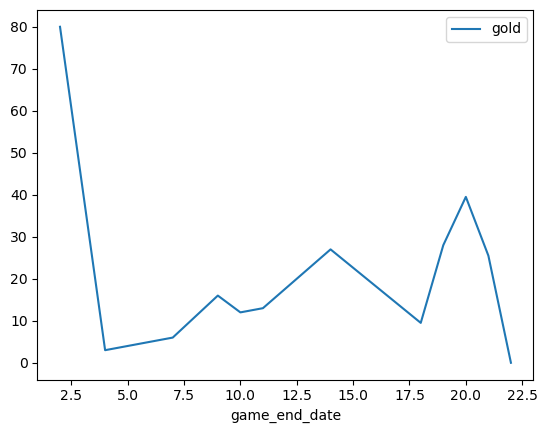

In [7]:
hourly_data = output_df.groupby(output_df.index.hour).mean()
hourly_data.plot()

## Step 2: Chart out the 'day of week' data of the chart representing host countries gold outcomes while in their country. 

<Axes: xlabel='day'>

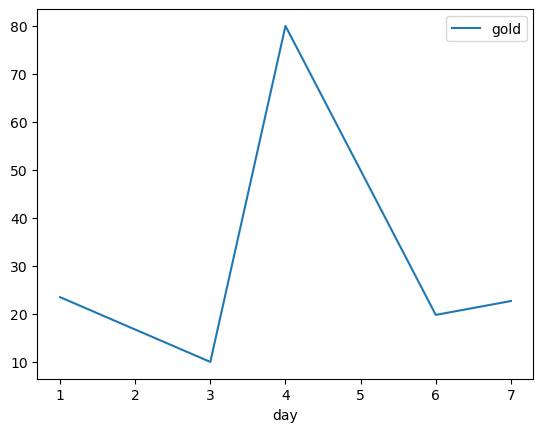

In [8]:
weekday_outcomes = output_df.groupby(output_df.index.isocalendar().day).mean()
weekday_outcomes.plot()

<Axes: xlabel='week'>

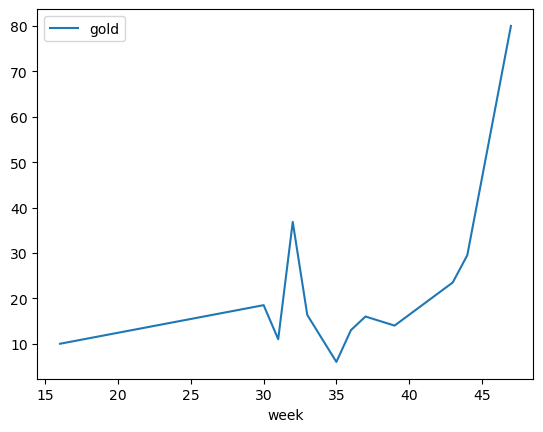

In [9]:
weekday_outcomes = output_df.groupby(output_df.index.isocalendar().week).mean()
weekday_outcomes.plot()

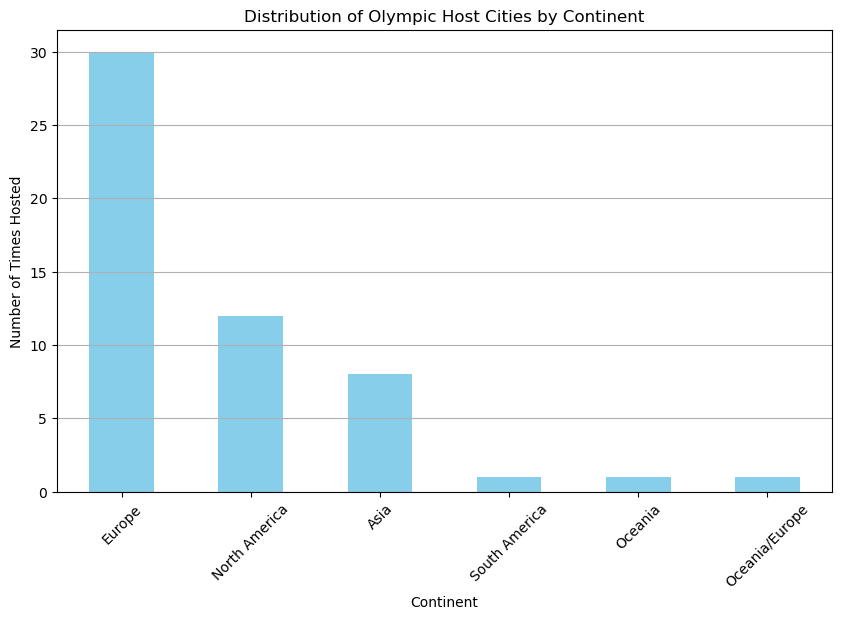

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
olympic_hosts = pd.read_csv('olympic_hosts.csv')

# Define the continent mapping
continent_mapping = {
    'China': 'Asia',
    'Japan': 'Asia',
    'Republic of Korea': 'Asia',
    'Brazil': 'South America',
    'Russian Federation': 'Europe',
    'Great Britain': 'Europe',
    'Canada': 'North America',
    'Italy': 'Europe',
    'Greece': 'Europe',
    'United States': 'North America',
    'Australia': 'Oceania',
    'Norway': 'Europe',
    'Spain': 'Europe',
    'France': 'Europe',
    'Yugoslavia': 'Europe',
    'USSR': 'Europe',
    'Austria': 'Europe',
    'Federal Republic of Germany': 'Europe',
    'Mexico': 'North America',
    'Australia, Sweden': 'Oceania/Europe',
    'Finland': 'Europe',
    'Switzerland': 'Europe',
    'Germany': 'Europe',
    'Netherlands': 'Europe',
    'Belgium': 'Europe',
    'Sweden': 'Europe'
}

# Map the game locations to continents
olympic_hosts['Continent'] = olympic_hosts['game_location'].map(continent_mapping)

# Count the number of times each continent has hosted the Olympics
continent_host_count = olympic_hosts['Continent'].value_counts()

# Plot the distribution of Olympic host cities by continent
plt.figure(figsize=(10, 6))
continent_host_count.plot(kind='bar', color='skyblue')
plt.title('Distribution of Olympic Host Cities by Continent')
plt.xlabel('Continent')
plt.ylabel('Number of Times Hosted')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()



<Figure size 1400x800 with 0 Axes>

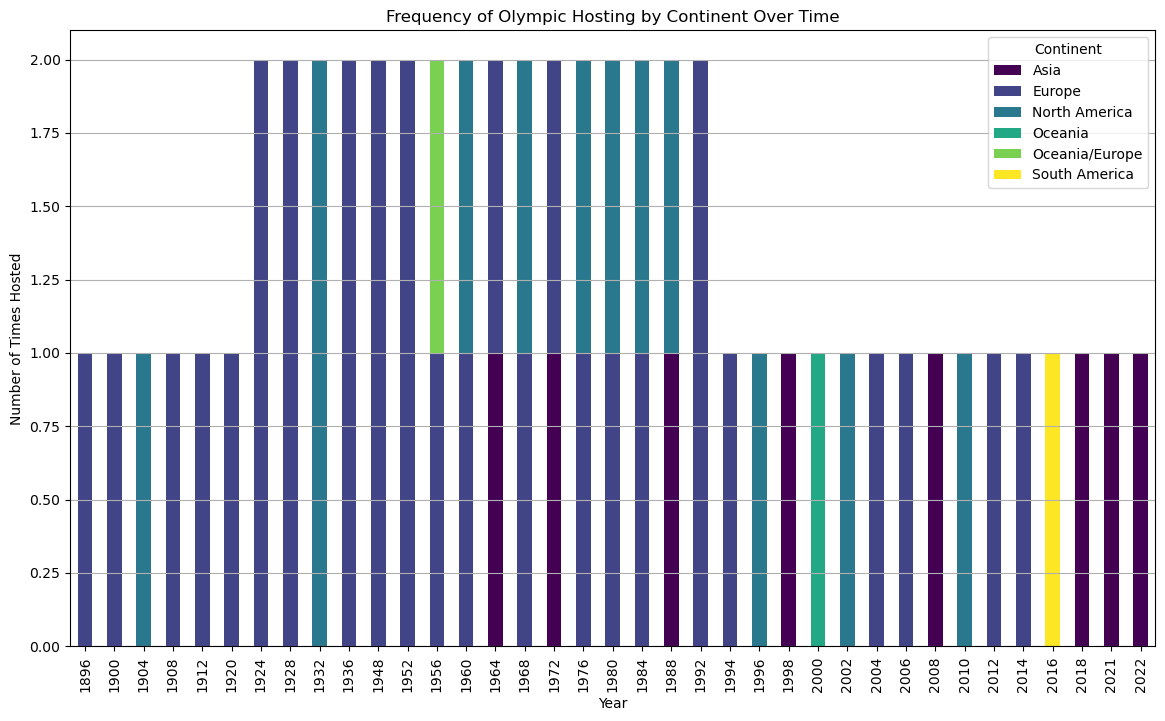

In [13]:
# Extract the year from the game_start_date
olympic_hosts['game_year'] = pd.to_datetime(olympic_hosts['game_start_date']).dt.year

# Group by continent and year to get the hosting frequency over time
continent_year_count = olympic_hosts.groupby(['Continent', 'game_year']).size().unstack().fillna(0)

# Plot the frequency of hosting by different continents over time
plt.figure(figsize=(14, 8))
continent_year_count.T.plot(kind='bar', stacked=True, colormap='viridis', figsize=(14, 8))
plt.title('Frequency of Olympic Hosting by Continent Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Times Hosted')
plt.legend(title='Continent')
plt.grid(axis='y')
plt.show()


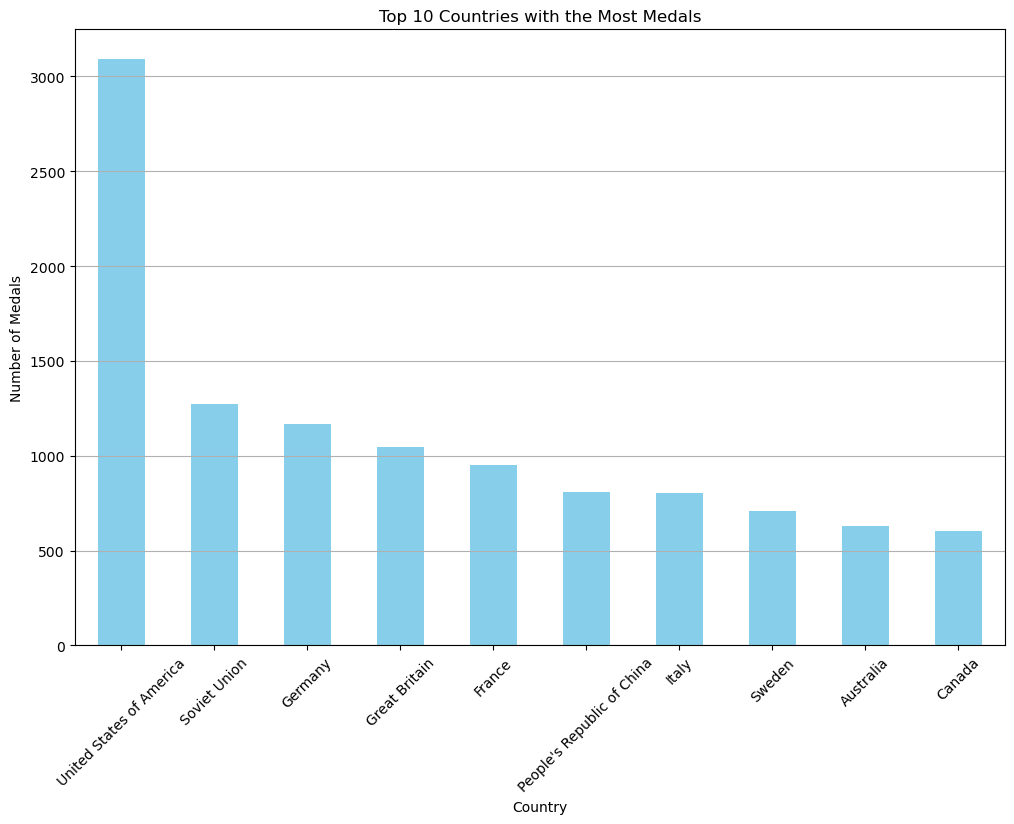

In [15]:
# Load the CSV file
olympic_medals = pd.read_csv('olympic_medals.csv')

# Group by country name and count the number of medals
country_medal_count = olympic_medals['country_name'].value_counts().head(10)

# Plot the top 10 countries with the most medals
plt.figure(figsize=(12, 8))
country_medal_count.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries with the Most Medals')
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


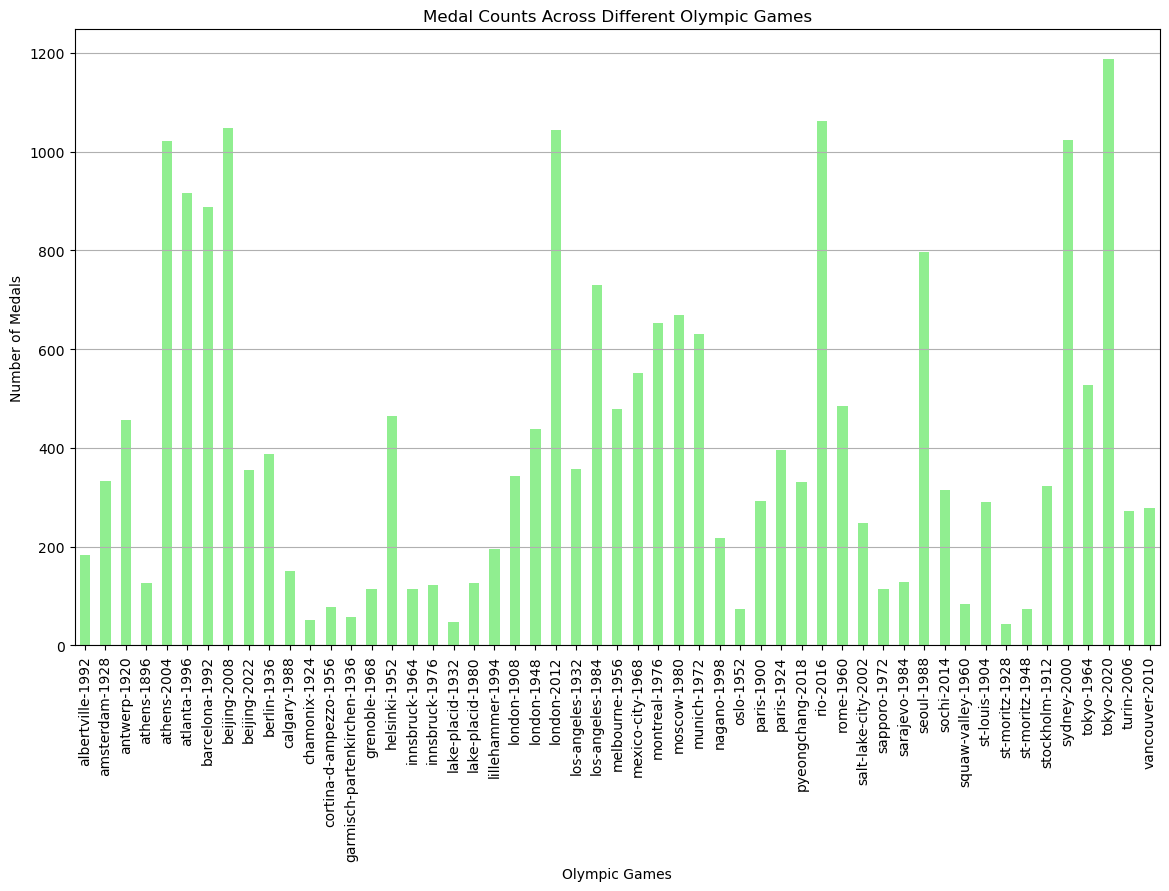

In [16]:
# Group by game (year) and count the number of medals
game_medal_count = olympic_medals['slug_game'].value_counts().sort_index()

# Plot the medal counts across different Olympic Games
plt.figure(figsize=(14, 8))
game_medal_count.plot(kind='bar', color='lightgreen')
plt.title('Medal Counts Across Different Olympic Games')
plt.xlabel('Olympic Games')
plt.ylabel('Number of Medals')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()


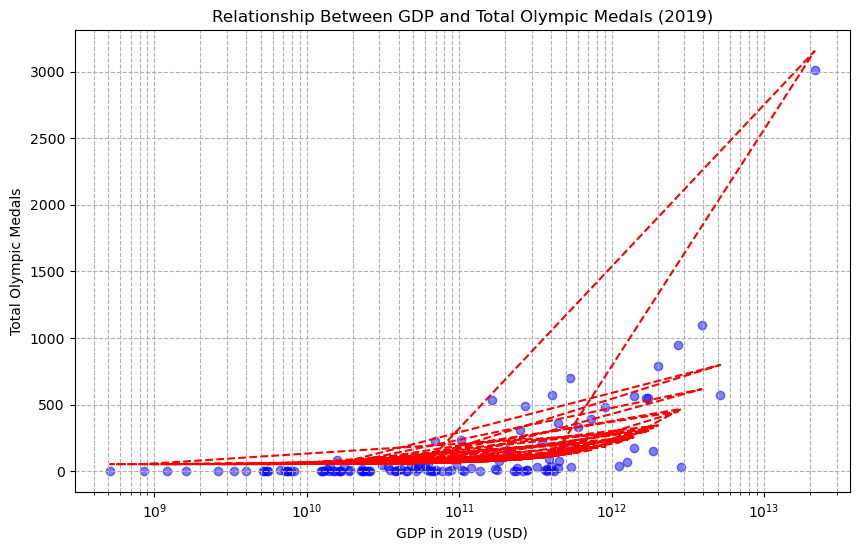

             total  GDP_2019
total     1.000000  0.888919
GDP_2019  0.888919  1.000000


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the data
olympic_analysis = pd.read_csv('olympic_analysis.csv')
gdp_data = pd.read_csv('gdp.csv')

# Aggregate total medals by country
medals_total = olympic_analysis.groupby('country')['total'].sum().reset_index()

# Extract the most recent year's GDP data (2019)
gdp_recent = gdp_data[['Country Name', '2019']].rename(columns={'2019': 'GDP_2019'})

# Merge the total medals data with the GDP data
merged_data = pd.merge(medals_total, gdp_recent, left_on='country', right_on='Country Name', how='inner')

# Remove rows with NaN GDP values
cleaned_data = merged_data.dropna(subset=['GDP_2019'])

# Prepare data for linear regression
X = cleaned_data['GDP_2019'].values.reshape(-1, 1)  # GDP values reshaped for sklearn
y = cleaned_data['total'].values  # Total medals

# Create linear regression object
reg = LinearRegression()

# Train the model
reg.fit(X, y)

# Make predictions
y_pred = reg.predict(X)

# Create a scatter plot to illustrate the relationship between GDP and total medals
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_data['GDP_2019'], cleaned_data['total'], color='blue', alpha=0.5)
plt.plot(cleaned_data['GDP_2019'], y_pred, "r--")  # Regression line
plt.title('Relationship Between GDP and Total Olympic Medals (2019)')
plt.xlabel('GDP in 2019 (USD)')
plt.ylabel('Total Olympic Medals')
plt.xscale('log')  # Using logarithmic scale to better visualize the data
plt.grid(True, which="both", ls="--")
plt.show()

# Calculate Pearson correlation coefficient
correlation = cleaned_data[['total', 'GDP_2019']].corr(method='pearson')
print(correlation)